In [1]:
import os
import sys
import IPython
import IPython.display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import collections
from datetime import datetime, timedelta

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import layers


cell_type = "lg"
model_type = "lstm_model"
base_path = '../../'

sys.path.append(base_path)
from training import utils

lg_data_path = base_path + 'datasets/Dataset_Li-ion'
pre_trained_path = base_path + 'pre-trained/' + cell_type + '_' + model_type

resample_1hz = False
vi_averages = True

In [2]:
print(dir(utils))  # Check if create_lstm_dataset is listed


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'app_create_dataset', 'collections', 'create_lstm_dataset', 'datetime', 'keep_only_y_end', 'lg_create_dataset', 'lg_get_files', 'normalization', 'np', 'os', 'panasonic_create_dataset', 'panasonic_get_files', 'pd', 'timedelta']


In [3]:
lg_charge_cycles = ['Charge']

lg_train_temps = ['n10degC', '0degC', '10degC', '25degC']
lg_train_discharge_cycles = ['Mixed']

lg_test_temps = ['n10degC', '0degC', '10degC', '25degC']
lg_test_discharge_cycles = ['UDDS', 'HWFET', 'LA92', 'US06']

lg_train_files = utils.lg_get_files(lg_data_path, 
                                    lg_train_discharge_cycles, 
                                    lg_charge_cycles, 
                                    lg_train_temps)

lg_test_files = utils.lg_get_files(lg_data_path, 
                                   lg_test_discharge_cycles,
                                   lg_charge_cycles, 
                                   lg_test_temps)

lg_train, lg_train_norm = utils.lg_create_dataset(lg_train_files, 
                                                  lg_train_discharge_cycles, 
                                                  lg_charge_cycles, 
                                                  vi_averages, 
                                                  resample_1hz)

lg_test, lg_test_norm = utils.lg_create_dataset(lg_test_files, 
                                                lg_test_discharge_cycles, 
                                                lg_charge_cycles, 
                                                vi_averages, 
                                                resample_1hz)
# create lstm dataset
steps = 300

train_x, train_y = utils.create_lstm_dataset(lg_train_norm,steps)
test_x, test_y = utils.create_lstm_dataset(lg_test_norm,steps)

train_y = utils.keep_only_y_end(train_y, steps)
test_y = utils.keep_only_y_end(test_y, steps)

../../datasets/Dataset_Li-ion/25degC/551_Mixed1.csv 77227
../../datasets/Dataset_Li-ion/25degC/551_Mixed2.csv 79172
../../datasets/Dataset_Li-ion/25degC/552_Mixed3.csv 73827
../../datasets/Dataset_Li-ion/25degC/552_Mixed4.csv 80850
../../datasets/Dataset_Li-ion/25degC/552_Mixed5.csv 72184
../../datasets/Dataset_Li-ion/25degC/552_Mixed6.csv 78106
../../datasets/Dataset_Li-ion/25degC/552_Mixed7.csv 73235
../../datasets/Dataset_Li-ion/25degC/552_Mixed8.csv 85915
../../datasets/Dataset_Li-ion/10degC/567_Mixed1.csv 72329
../../datasets/Dataset_Li-ion/10degC/567_Mixed2.csv 77752
../../datasets/Dataset_Li-ion/10degC/571_Mixed4.csv 73929
../../datasets/Dataset_Li-ion/10degC/571_Mixed5.csv 67174
../../datasets/Dataset_Li-ion/10degC/571_Mixed6.csv 73921
../../datasets/Dataset_Li-ion/10degC/571_Mixed7.csv 69325
../../datasets/Dataset_Li-ion/10degC/571_Mixed8.csv 81422
../../datasets/Dataset_Li-ion/0degC/589_Mixed1.csv 67312
../../datasets/Dataset_Li-ion/0degC/589_Mixed2.csv 72303
../../datasets/D

# Train and Test datasets 

## Train :

In [4]:
lg_train.describe()


Time Stamp,Voltage,Current,Temperature,Power,Capacity,Voltage Average,Current Average,Power Average
count,1.766953e+06,1.766953e+06,1.766953e+06,1.766953e+06,1.766953e+06,1.766953e+06,1.766953e+06,1.766953e+06
mean,3.666106e+00,-1.327566e+00,7.852386e+00,-4.572944e+00,4.866523e-01,3.700793e+00,-1.289260e+00,-4.494775e+00
std,2.629067e-01,2.560378e+00,1.253895e+01,8.942017e+00,2.682614e-01,2.274651e-01,7.207943e-01,2.448886e+00
min,2.788130e+00,-1.809828e+01,-9.884900e+00,-5.087535e+01,0.000000e+00,3.094400e+00,-3.711826e+00,-1.143444e+01
25%,3.495400e+00,-2.551540e+00,-3.154800e-01,-9.204682e+00,2.694423e-01,3.521779e+00,-1.715167e+00,-5.985586e+00
50%,3.672890e+00,-9.424600e-01,9.359110e+00,-3.438450e+00,4.746089e-01,3.695029e+00,-1.160927e+00,-4.120764e+00
75%,3.861010e+00,-9.706000e-02,2.397615e+01,-3.858435e-01,7.170703e-01,3.890524e+00,-7.648380e-01,-2.685925e+00
max,4.209560e+00,6.004720e+00,2.628963e+01,2.518435e+01,9.780410e-01,4.168740e+00,1.225048e+00,5.168611e+00


## Test :


In [5]:
lg_test.describe()


Time Stamp,Voltage,Current,Temperature,Power,Capacity,Voltage Average,Current Average,Power Average
count,1.042865e+06,1.042865e+06,1.042865e+06,1.042865e+06,1.042865e+06,1.042865e+06,1.042865e+06,1.042865e+06
mean,3.677300e+00,-1.099719e+00,6.917488e+00,-3.778445e+00,4.836284e-01,3.704194e+00,-1.097604e+00,-3.823480e+00
std,2.612963e-01,2.359092e+00,1.207145e+01,8.247301e+00,2.673204e-01,2.291017e-01,7.277663e-01,2.438030e+00
min,2.786280e+00,-1.807018e+01,-1.009522e+01,-5.086696e+01,0.000000e+00,3.049703e+00,-3.810302e+00,-1.188613e+01
25%,3.496750e+00,-2.196520e+00,-4.206300e-01,-7.929746e+00,2.580472e-01,3.523453e+00,-1.336604e+00,-4.540661e+00
50%,3.688530e+00,-6.257500e-01,9.148790e+00,-2.318157e+00,4.939021e-01,3.715520e+00,-8.687049e-01,-3.073495e+00
75%,3.884600e+00,-8.428000e-02,2.376583e+01,-3.210706e-01,7.132168e-01,3.899700e+00,-5.239784e-01,-1.887389e+00
max,4.200460e+00,6.002170e+00,2.681543e+01,2.518130e+01,9.559094e-01,4.110379e+00,-3.098554e-01,-1.233941e+00


In [6]:
lg_train

Time Stamp,Voltage,Current,Temperature,Power,Capacity,Voltage Average,Current Average,Power Average
0,4.11283,-0.47506,23.87099,-1.953841,0.971943,4.132925,-0.523843,-2.133588
1,4.10997,-0.62064,23.87099,-2.550812,0.971936,4.132910,-0.523957,-2.134056
2,4.10761,-0.72792,23.87099,-2.990011,0.971928,4.132895,-0.524087,-2.134587
3,4.10676,-0.75856,23.87099,-3.115224,0.971920,4.132879,-0.524221,-2.135136
4,4.10643,-0.76623,23.87099,-3.146470,0.971912,4.132864,-0.524356,-2.135688
...,...,...,...,...,...,...,...,...
1766948,2.79976,-4.74805,-8.51784,-13.293400,0.000166,3.331813,-1.096080,-3.241588
1766949,2.86230,-3.05725,-8.51784,-8.750767,0.000123,3.331714,-1.096394,-3.242341
1766950,2.87915,-3.13387,-8.51784,-9.022882,0.000081,3.331623,-1.096669,-3.242972
1766951,2.89011,-3.14153,-8.51784,-9.079367,0.000043,3.331536,-1.096929,-3.243563


In [7]:
lg_test

Time Stamp,Voltage,Current,Temperature,Power,Capacity,Voltage Average,Current Average,Power Average
0,4.17669,2.75078,23.97615,11.489155,0.955238,4.110379,-0.834834,-3.352909
1,4.17147,2.46983,23.97615,10.302822,0.955265,4.110377,-0.834330,-3.350806
2,4.16860,2.31658,23.97615,9.656895,0.955288,4.110373,-0.833850,-3.348806
3,4.16776,2.27827,23.97615,9.495283,0.955315,4.110370,-0.833377,-3.346832
4,4.16759,2.26550,23.97615,9.441675,0.955338,4.110367,-0.832905,-3.344867
...,...,...,...,...,...,...,...,...
1042860,2.79976,-8.15010,-6.30951,-22.818324,0.000418,3.102223,-2.747899,-7.679625
1042861,2.79976,-8.04538,-6.30951,-22.525133,0.000310,3.102198,-2.748352,-7.680747
1042862,2.79976,-7.95088,-6.30951,-22.260556,0.000202,3.102172,-2.748786,-7.681816
1042863,2.80094,-7.82828,-6.30951,-21.926543,0.000103,3.102163,-2.748584,-7.681164


In [8]:
lg_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766953 entries, 0 to 1766952
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Voltage          float64
 1   Current          float64
 2   Temperature      float64
 3   Power            float64
 4   Capacity         float64
 5   Voltage Average  float64
 6   Current Average  float64
 7   Power Average    float64
dtypes: float64(8)
memory usage: 107.8 MB


In [9]:
lg_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042865 entries, 0 to 1042864
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Voltage          1042865 non-null  float64
 1   Current          1042865 non-null  float64
 2   Temperature      1042865 non-null  float64
 3   Power            1042865 non-null  float64
 4   Capacity         1042865 non-null  float64
 5   Voltage Average  1042865 non-null  float64
 6   Current Average  1042865 non-null  float64
 7   Power Average    1042865 non-null  float64
dtypes: float64(8)
memory usage: 63.7 MB


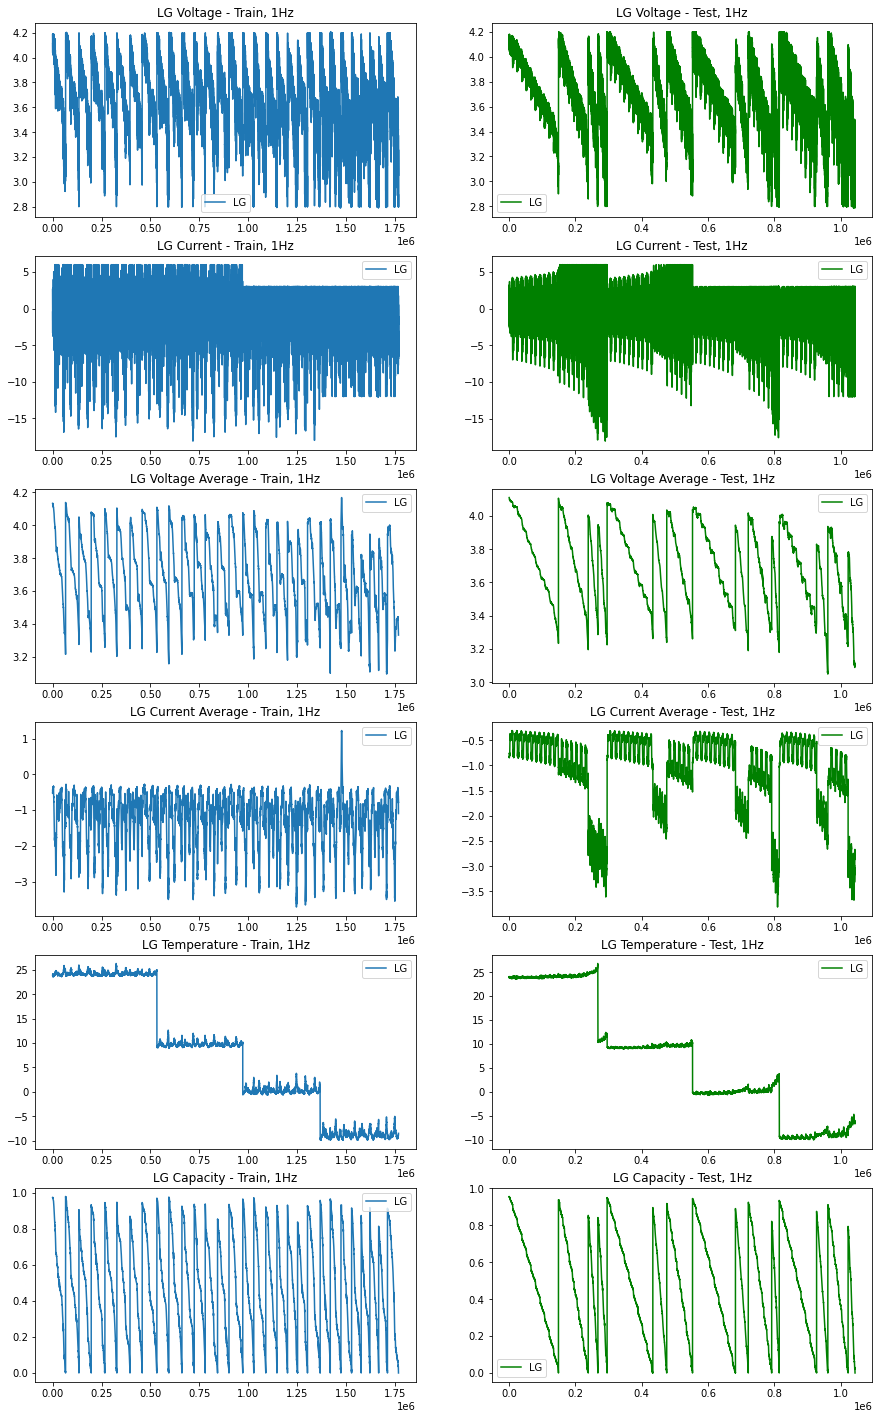

In [10]:
plot_cols = ['Voltage', 'Current', 'Voltage Average', 'Current Average', 'Temperature', 'Capacity']

fig, axs = plt.subplots(nrows=len(plot_cols), ncols=2, figsize=(15, 25))

for i, col in enumerate(plot_cols):
    axs[i, 0].plot(lg_train[col], label='LG')
    axs[i, 0].set_title(f'LG {col} - Train, 1Hz')
    axs[i, 0].legend()
    
    axs[i, 1].plot(lg_test[col], label='LG', color="green")
    axs[i, 1].set_title(f'LG {col} - Test, 1Hz')
    axs[i, 1].legend()

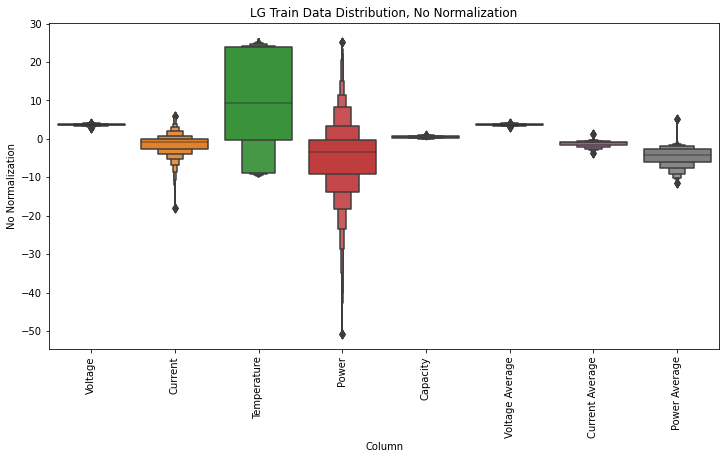

In [11]:
# Melt the DataFrame for seaborn compatibility
df_std = lg_train.melt(var_name='Column', value_name='No Normalization')

# Create a figure for the boxen plot
plt.figure(figsize=(12, 6))

# Create the boxen plot
ax = sns.boxenplot(x='Column', y='No Normalization', data=df_std)

# Set the x-tick labels with a rotation for better readability
ax.set_xticklabels(lg_train.keys(), rotation=90)

# Set the title of the plot
ax.set_title(label='LG Train Data Distribution, No Normalization')

# Display the plot
plt.show()

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (8).

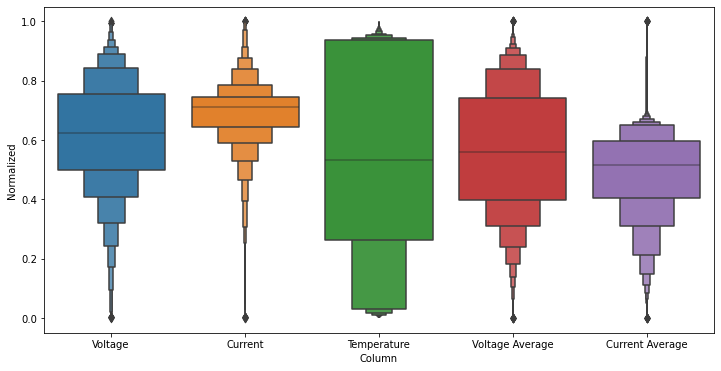

In [12]:
# Melt the DataFrame for seaborn compatibility
df_std = lg_train_norm.melt(var_name='Column', value_name='Normalized')

# Create a figure for the boxen plot
plt.figure(figsize=(12, 6))

# Create the boxen plot
ax = sns.boxenplot(x='Column', y='Normalized', data=df_std)

# Set the x-tick labels with a rotation for better readability
ax.set_xticklabels(lg_train.columns, rotation=90)

# Set the title of the plot
ax.set_title(label='LG Train Data Distribution, No Normalization')

# Display the plot
plt.show()

In [13]:
ax = sns.pairplot(lg_train_norm[['Voltage', 'Current', 'Power', 'Temperature', 'Capacity']], diag_kind='kde')
ax.fig.suptitle("Pair Plot, LG Training Dataset", y = 1.01) 

KeyError: "['Power', 'Capacity'] not in index"

# lstm implementation


In [14]:
# LSTM model architecture - https://github.com/KeiLongW/battery-state-estimation
opt = tf.keras.optimizers.Adam(lr=0.00001)

lstm_model = Sequential()
lstm_model.add(LSTM(256, activation='selu',
                    return_sequences=True,
                    input_shape=(train_x.shape[1], train_x.shape[2])))
lstm_model.add(LSTM(256, activation='selu', return_sequences=False))
lstm_model.add(Dense(256, activation='selu'))
lstm_model.add(Dense(128, activation='selu'))
lstm_model.add(Dense(1, activation='linear'))
lstm_model.summary()

lstm_model.compile(optimizer=opt, loss='huber', metrics=['mse', 'mae', 'mape', tf.keras.metrics.RootMeanSquaredError(name='rmse')])

es = EarlyStopping(monitor='val_loss', patience=50)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 300, 256)          268288    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 892417 (3.40 MB)
Trainable params: 892417 (3.40 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = lstm_model.fit(
    train_x, 
    train_y, 
    epochs=75, batch_size=32, 
    verbose=1, validation_split=0.2,
    callbacks = [es])

Epoch 1/75
148/148 [==============================] - 270s 2s/step - loss: 0.0747 - mse: 0.3559 - mae: 0.1527 - mape: 989.2626 - rmse: 0.5966 - val_loss: 0.0048 - val_mse: 0.0097 - val_mae: 0.0618 - val_mape: 810.8669 - val_rmse: 0.0984
Epoch 2/75
148/148 [==============================] - 260s 2s/step - loss: 0.0040 - mse: 0.0080 - mae: 0.0572 - mape: 376.8115 - rmse: 0.0893 - val_loss: 0.0045 - val_mse: 0.0090 - val_mae: 0.0590 - val_mape: 750.4469 - val_rmse: 0.0949
Epoch 3/75
148/148 [==============================] - 248s 2s/step - loss: 0.0029 - mse: 0.0057 - mae: 0.0421 - mape: 356.0990 - rmse: 0.0756 - val_loss: 0.0032 - val_mse: 0.0065 - val_mae: 0.0406 - val_mape: 761.7086 - val_rmse: 0.0804
Epoch 4/75
148/148 [==============================] - 248s 2s/step - loss: 0.0029 - mse: 0.0057 - mae: 0.0430 - mape: 381.9983 - rmse: 0.0755 - val_loss: 0.0029 - val_mse: 0.0058 - val_mae: 0.0364 - val_mape: 741.6009 - val_rmse: 0.0760
Epoch 5/75
148/148 [==============================] 

148/148 [==============================] - 374s 3s/step - loss: 0.0021 - mse: 0.0043 - mae: 0.0285 - mape: 353.2814 - rmse: 0.0655 - val_loss: 0.0030 - val_mse: 0.0059 - val_mae: 0.0390 - val_mape: 729.7524 - val_rmse: 0.0769
Epoch 36/75
148/148 [==============================] - 316s 2s/step - loss: 0.0022 - mse: 0.0044 - mae: 0.0301 - mape: 364.6519 - rmse: 0.0660 - val_loss: 0.0030 - val_mse: 0.0060 - val_mae: 0.0375 - val_mape: 763.3962 - val_rmse: 0.0776
Epoch 37/75
148/148 [==============================] - 286s 2s/step - loss: 0.0023 - mse: 0.0045 - mae: 0.0328 - mape: 350.2318 - rmse: 0.0674 - val_loss: 0.0031 - val_mse: 0.0062 - val_mae: 0.0382 - val_mape: 778.1139 - val_rmse: 0.0786
Epoch 38/75
148/148 [==============================] - 5518s 38s/step - loss: 0.0022 - mse: 0.0045 - mae: 0.0294 - mape: 373.6267 - rmse: 0.0668 - val_loss: 0.0029 - val_mse: 0.0058 - val_mae: 0.0357 - val_mape: 743.1625 - val_rmse: 0.0762
Epoch 39/75
148/148 [==============================] - 236

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = xgb_model.predict(test_features)

# Calculate evaluation metrics
mae = mean_absolute_error(test_labels, y_pred)
mse = mean_squared_error(test_labels, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_labels, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


In [ ]:
import matplotlib.pyplot as plt



# Set up the figure with subplots
plt.figure(figsize=(16, 8))

# Plot 1: True vs Predicted SOC
plt.subplot(1, 2, 1)
plt.scatter(test_labels, y_pred, color='blue', alpha=0.5)
plt.xlabel('True Values [SOC]')
plt.ylabel('Predictions [SOC]')
lims = [0, 1.7]  # Adjust this based on your SOC range
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, 'r--')  # Dashed red line for the ideal case
plt.title('Predicted SOC vs True SOC')

# Plot 2: Prediction Error Distribution
plt.subplot(1, 2, 2)
error = y_pred - test_labels
plt.hist(error, bins=25, color='dodgerblue', edgecolor='black')
plt.xlabel('Prediction Error [SOC]')
plt.ylabel('Count')
plt.title('Prediction Error Distribution')
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a modern theme using seaborn
sns.set(style="whitegrid")

# Let's assume you have trained your XGBoost model and have 'test_labels' and 'test_predictions'
# Assuming you also have 'y_train' and 'y_pred_train' from training predictions

plt.figure(figsize=(14, 6))

# Plot 1: True vs Predicted SOC over time
plt.subplot(1, 1, 1)
plt.plot(test_labels.reset_index(drop=True), label='True SOC', color='forestgreen', linestyle='-', linewidth=2)
plt.plot(y_pred, label='Predicted SOC', color='firebrick', linestyle='--', linewidth=2)
plt.xlabel('Time')
plt.ylabel('SOC')
plt.title('True SOC vs Predicted SOC Over Time', fontsize=14)
plt.legend()
plt.grid(True)



# Tight layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(test_labels, y_pred)

print(f"R-squared: {r2:.2f}")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score

# True and predicted values
y_true = test_labels

# Calculating various metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
explained_variance = explained_variance_score(y_true, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R-squared: {r2:.3f}")
print(f"Explained Variance: {explained_variance:.3f}")


In [ ]:

# Set a modern theme using Seaborn
sns.set(style="whitegrid")

# Calculate the prediction errors
error = y_pred - test_labels

# Plotting the histogram of prediction errors
plt.figure(figsize=(10, 6))

# Using Seaborn's histogram plotting function for enhanced style
sns.histplot(error, bins=25, kde=True, color='dodgerblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Prediction Error [SOC]', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Prediction Error Distribution', fontsize=16)

# Enhancing the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np


cycle_num = 0
steps_num = 100000
step_index = np.arange(cycle_num*steps_num, (cycle_num+1)*steps_num)

fig = go.Figure()
fig.add_trace(go.Scatter(x=step_index, y=y_pred[cycle_num*steps_num:(cycle_num+1)*steps_num],
                    mode='lines', name='SOC Predicted'))
fig.add_trace(go.Scatter(x=step_index, y=test_labels[cycle_num*steps_num:(cycle_num+1)*steps_num],
                    mode='lines', name='SOC Actual'))
fig.add_trace(go.Scatter(x=step_index, y=lg_test_norm['Temperature'][cycle_num*steps_num:(cycle_num+1)*steps_num],
                    mode='lines', name='Temperature'))
fig.update_layout(title='Result on Test Dataset',
                  xaxis_title='Step',
                  yaxis_title='SOC Percentage')
fig.show()

In [ ]:
# Assuming the previous code has been executed and the following variables are available:
# train_mae, val_mae, test_mae

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    "Epoch": range(1, len(train_mae) + 1),
    "Training MAE": train_mae,
    "Validation MAE": val_mae
})

# Display the final MAE values for Training, Validation, and Test
final_results_df = pd.DataFrame({
    "Metric": ["Training MAE", "Validation MAE", "Test MAE"],
    "Value": [train_mae[-1], val_mae[-1], mae]
})

# Print the results table
print("Training and Validation MAE per Epoch:")
print(results_df)

print("\nFinal MAE Results:")
print(final_results_df)


In [ ]:
evals_result = xgb_model.evals_result()

# Training and Validation MAE from the last iteration
training_mae = evals_result['validation_0']['mae'][-1]

# Predict on the test set
test_predictions = xgb_model.predict(test_features)

# Calculate MAE on the test set
test_mae = mean_absolute_error(test_labels, test_predictions)

# Create a DataFrame to store the MAE values
mae_results = pd.DataFrame({
    'Metric': ['Training MAE',  'Test MAE'],
    'Value': [training_mae,  test_mae]
})

# Print the final MAE results
print("Final MAE Results:")
print(mae_results)

# Plot the MAE results
plt.figure(figsize=(8, 6))
plt.bar(mae_results['Metric'], mae_results['Value'], color=['blue', 'green', 'red'])
plt.title('Mean Absolute Error (MAE) Results')
plt.ylabel('MAE')
plt.show()
